In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('Dataset.csv')

In [3]:
data = data.drop(columns=['Unnamed: 0'], errors='ignore', axis=1)

Data Visualization

Distribution of the Number of Dives per Year

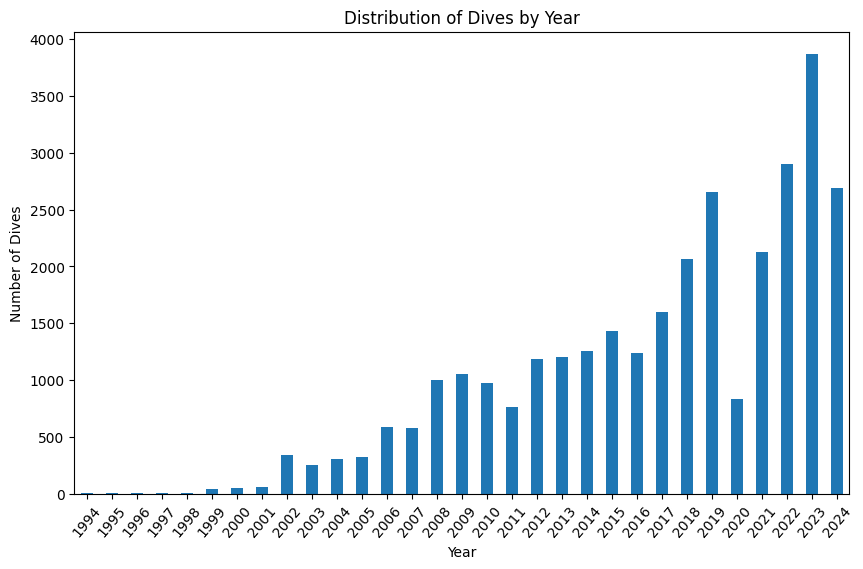

In [4]:
dives = data['Year'].value_counts().sort_index()
dives.plot(kind='bar', figsize=(10, 6))
plt.title('Distribution of Dives by Year')
plt.xlabel('Year')
plt.ylabel('Number of Dives')
plt.xticks(rotation=50)
plt.show()

This graph shows the evolution of the number of dives carried out each year from 1995 to 2024.

Observation:

 - There is a general upward trend, with a significant increase starting in 2015.
Peaks are noticeable after 2019, which could be due to a specific event or a change in diving practices.

Interpretation

Distribution of Divers by Year / Gender / Nationality

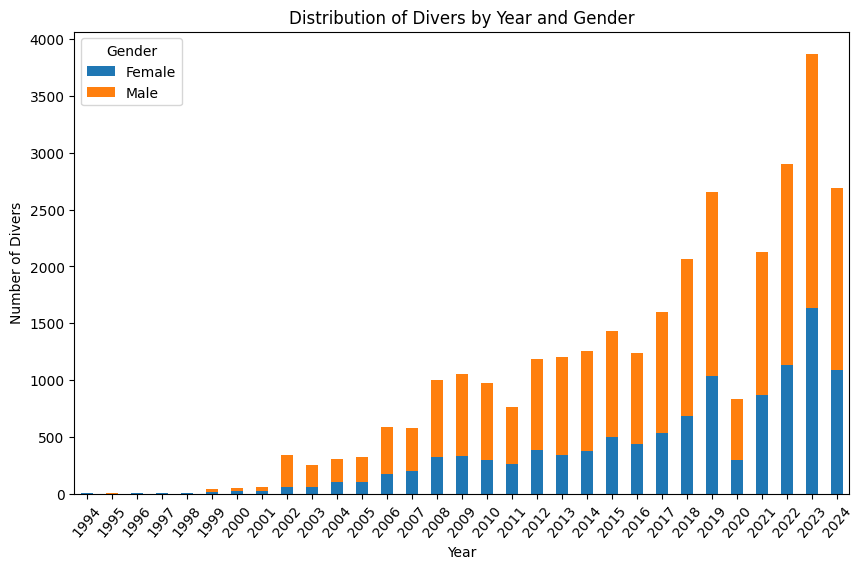

In [5]:
# By Year and Gender
data.groupby(['Year', 'Gender']).size().unstack().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Distribution of Divers by Year and Gender')
plt.xlabel('Year')
plt.ylabel('Number of Divers')
plt.xticks(rotation=50)
plt.show()

This graph shows the number of divers per year, categorized by gender (women and men).

Observation:
 - Overall, men have a higher participation in diving compared to women.
    Both genders show similar upward trends in the number of divers, but men dominate in terms of total dives.
 - It is also evident that there was a sharper increase for women starting around 2018–2019.

In [6]:
top_nationalities = data['Nationality'].value_counts().head(10).index

# Filter the data 
filtered_data = data[data['Nationality'].isin(top_nationalities)]

# I will adjust the number of labels to match the number of bins.
year_bins = range(min(filtered_data['Year']), max(filtered_data['Year']) + 6, 5)
year_labels = [f"{i}-{i+4}" for i in range(min(filtered_data['Year']), max(filtered_data['Year']) + 1, 5)]

# Create Year Group column
filtered_data['Year Group'] = pd.cut(filtered_data['Year'], bins=year_bins, right=False, labels=year_labels)

# Group by Year Group and Nationality and count divers
diver_counts = filtered_data.groupby(['Year Group', 'Nationality']).size().unstack(fill_value=0)


C:\Users\amina\AppData\Local\Temp\ipykernel_26644\766048842.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Year Group'] = pd.cut(filtered_data['Year'], bins=year_bins, right=False, labels=year_labels)
C:\Users\amina\AppData\Local\Temp\ipykernel_26644\766048842.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  diver_counts = filtered_data.groupby(['Year Group', 'Nationality']).size().unstack(fill_value=0)


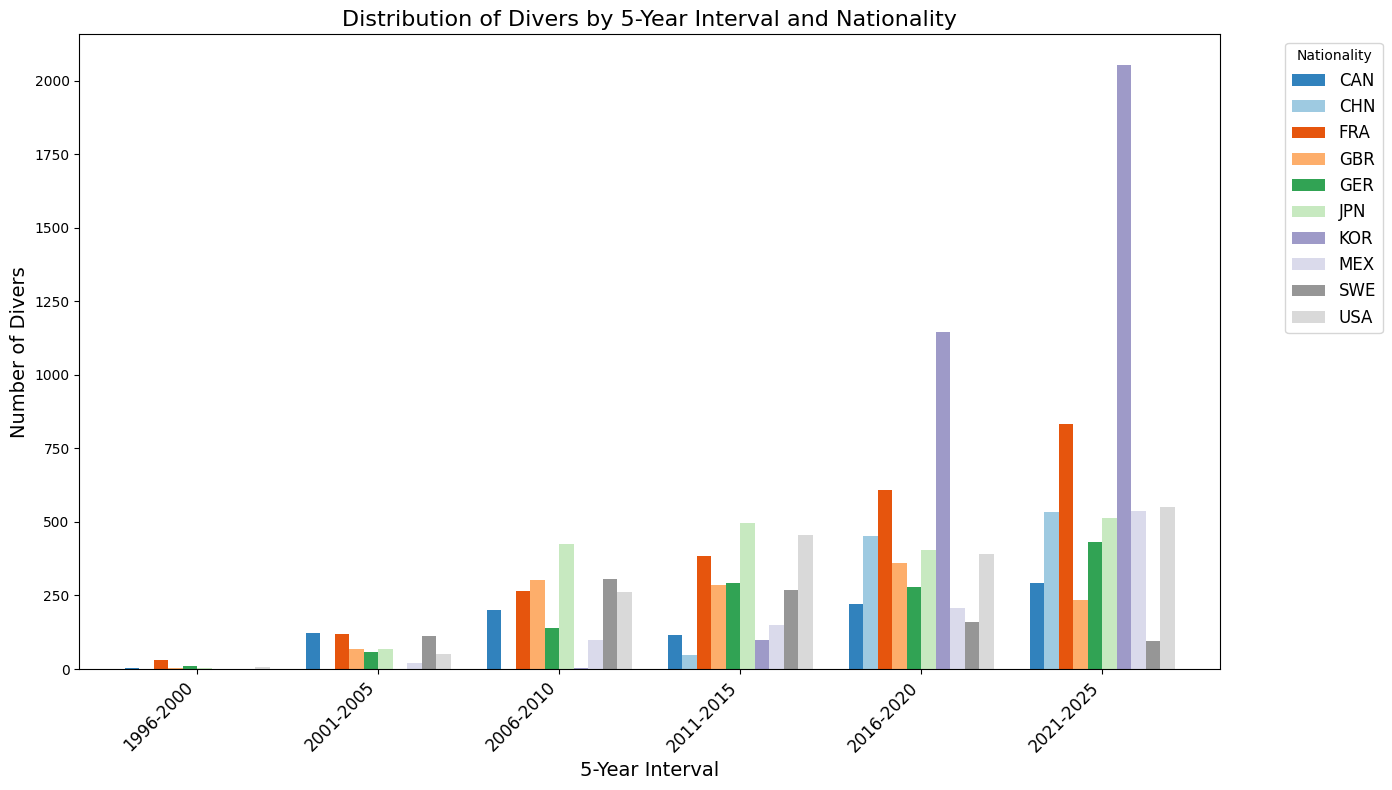

In [7]:
# Create a grouped bar chart
ax = diver_counts.plot(kind='bar', stacked=False, figsize=(14, 8), width=0.8, cmap='tab20c')
plt.title('Distribution of Divers by 5-Year Interval and Nationality', fontsize=16)
plt.xlabel('5-Year Interval', fontsize=14)
plt.ylabel('Number of Divers', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.legend(title='Nationality', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.tight_layout()
plt.show()

This graph shows the distribution of divers by country over 5-year intervals.

Observation:
 - Divers from certain countries, such as Canada (CAN) and France (FRA),    became more prominent starting from 2021–2025.
 - The graph highlights differences in participation by country, with peaks in diving activity primarily associated with specific nationalities.

Distribution of White / Yellow / Red Cards by Discipline and Year

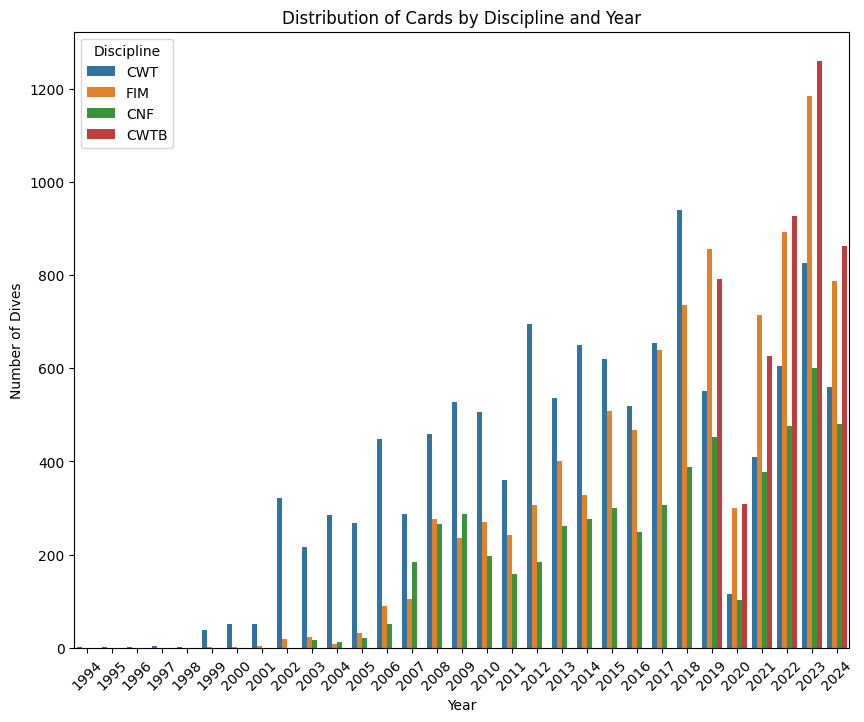

In [8]:
plt.figure(figsize=(10,8))
sns.countplot(x='Year', hue='Discipline', data=data[['Year', "Discipline",'Card']])
plt.title('Distribution of Cards by Discipline and Year')
plt.xlabel('Year')
plt.ylabel('Number of Dives')
plt.xticks(rotation=45)
plt.legend(title='Discipline')
plt.show()


This graph illustrates the number of cards distributed (RED, YELLOW, WHITE) by discipline (CWT, FIM, CNF, CWTB) and by year.

Observation:
 - A clear increase in distributed cards is noticeable after 2010, particularly in the CWT and FIM disciplines.
 - By 2024, all disciplines experienced growth, with CWT remaining the dominant discipline.
 - This reflects a consistent progression of activity across all disciplines over the years.

Other graphs

Announced Depth vs. Realized Depth

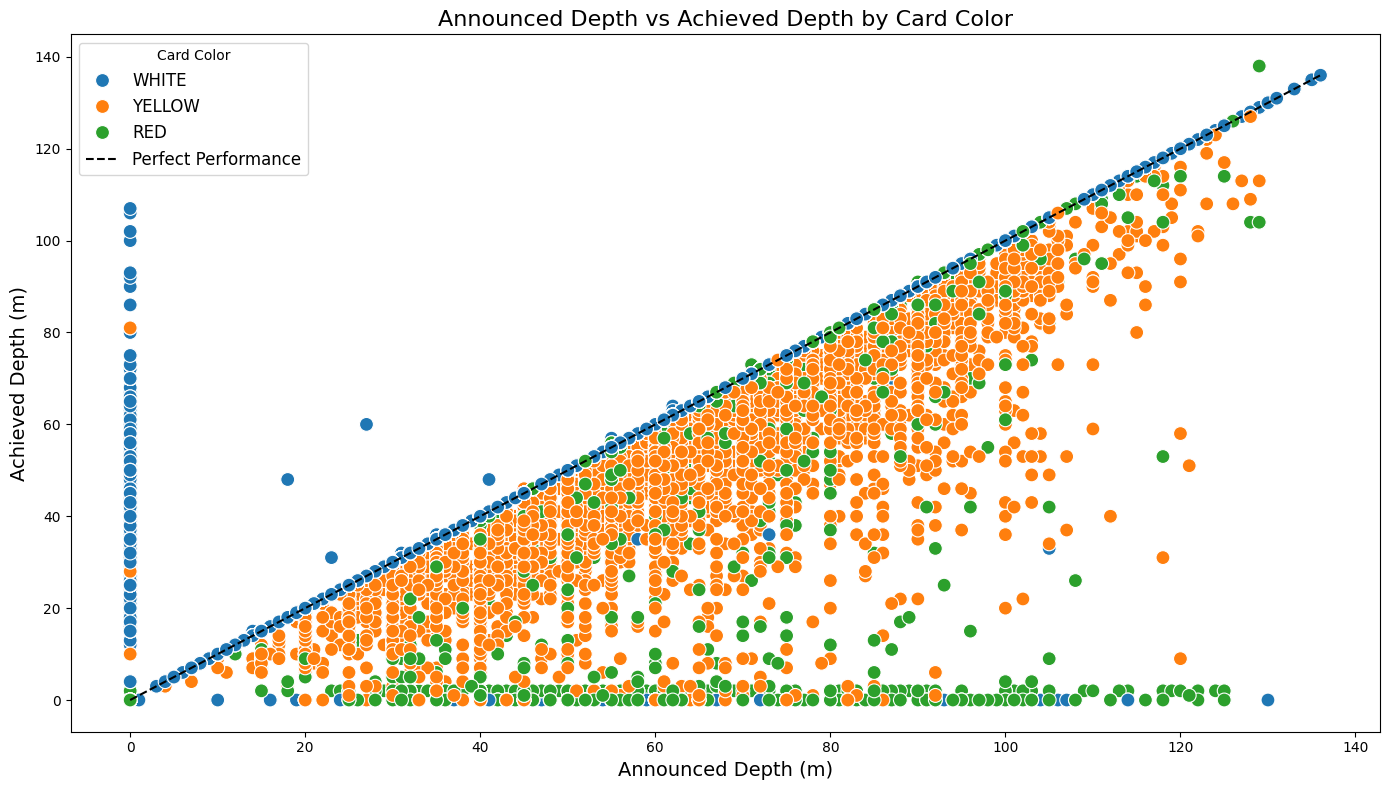

In [9]:
plt.figure(figsize=(14, 8))
sns.scatterplot(x='AP', y='RP', hue='Card', data=data, palette='tab10', s=100)
plt.title('Announced Depth vs Achieved Depth by Card Color', fontsize=16)
plt.xlabel('Announced Depth (m)', fontsize=14)
plt.ylabel('Achieved Depth (m)', fontsize=14)
plt.plot([data['AP'].min(), data['AP'].max()], [data['AP'].min(), data['AP'].max()], 'k--', label='Perfect Performance')
plt.legend(title='Card Color', fontsize=12)
plt.tight_layout()
plt.show()


This scatter plot compares the depth announced by divers with the depth actually achieved, categorized by card color (WHITE, YELLOW, RED).

Observation:
 - Points aligned along the diagonal represent successful dives (WHITE cards).
 - Dives with significant discrepancies (below the diagonal) often result in RED or YELLOW cards.
 - This clearly highlights a correlation between the success of a dive and the depth achieved.

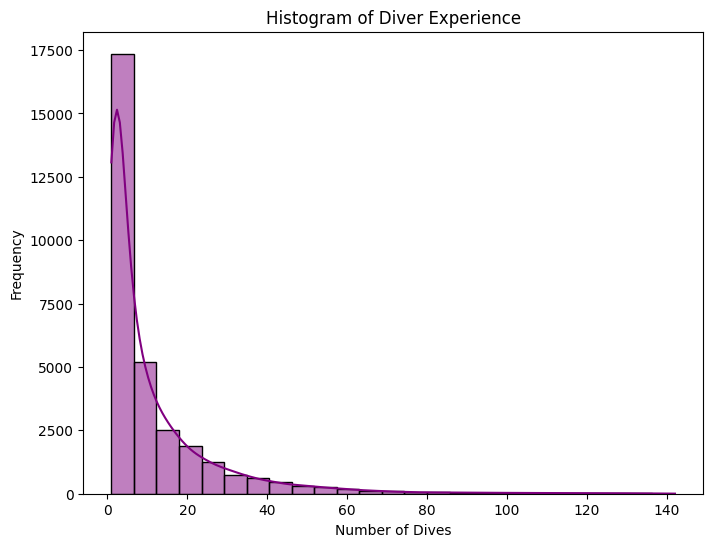

In [10]:
plt.figure(figsize=(8, 6))
sns.histplot(data['experience_dive'], bins=25
             , color='purple', kde=True)
plt.title('Histogram of Diver Experience')
plt.xlabel('Number of Dives')
plt.ylabel('Frequency')
plt.show()

This histogram represents the distribution of divers based on their experience (total number of dives completed).

Observation:
 - The majority of divers have completed fewer than 20 dives, indicating a dominance of beginner divers.
 - Beyond 30 dives, the frequency drops significantly, suggesting that few divers achieve high levels of experience.

Number of Successful Dives (White Card) Over Time

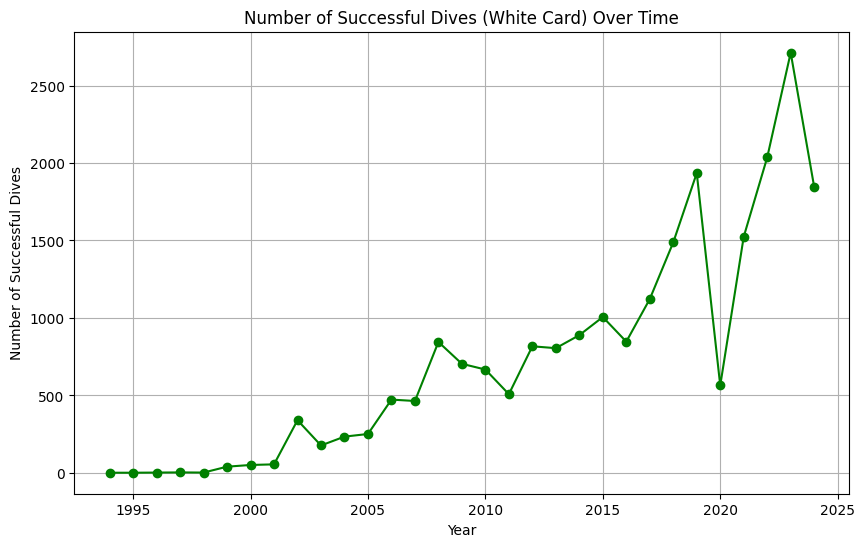

In [11]:
successful_dives = data[data['Card'] == 'WHITE'].groupby('Year').size()
plt.figure(figsize=(10, 6))
plt.plot(successful_dives.index, successful_dives.values, marker='o', color='green')
plt.title('Number of Successful Dives (White Card) Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Successful Dives')
plt.grid(True)
plt.show()


This line graph shows the progression of successful dives (WHITE cards) over the years.

Observation:
 - A slow increase is visible up until 2010, followed by a rapid rise after 2015.
 - The number of successful dives peaks around 2020, with a slight decline observed toward 2024.
 - This trend reflects the overall improvement in diver performance over the years.

Create Graphs Based on the New Features

Depth Difference by Card Type

C:\Users\amina\AppData\Local\Temp\ipykernel_26644\136906273.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Card', y='Depth Difference', data=data, palette='Set2')


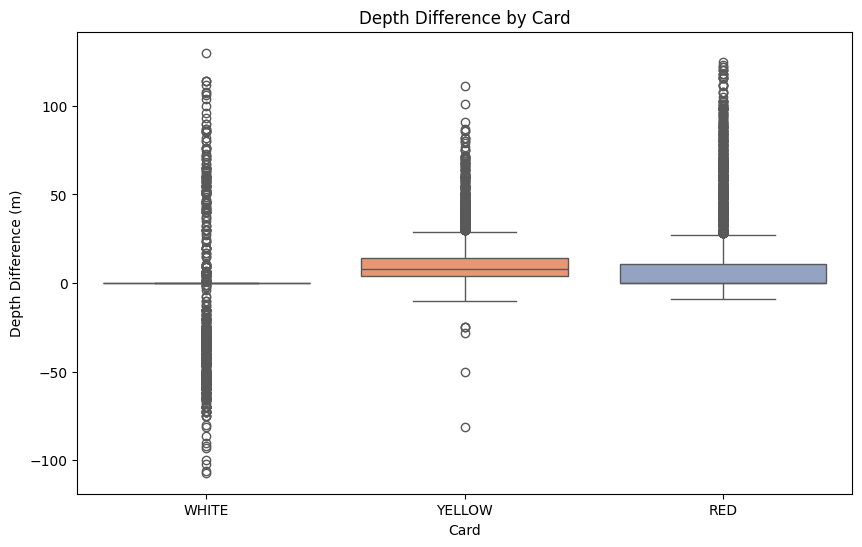

In [12]:
# Create a new column for the difference between AP and RP
data['Depth Difference'] = data['AP'] - data['RP']

plt.figure(figsize=(10, 6))
sns.boxplot(x='Card', y='Depth Difference', data=data, palette='Set2')
plt.title('Depth Difference by Card')
plt.xlabel('Card')
plt.ylabel('Depth Difference (m)')
plt.show()


The boxplot compares the depth difference for each card type.

Observations:
 - For WHITE cards, the depth difference centers around zero with a wide spread, indicating varied diving conditions.
 - YELLOW cards show slightly more variation with outliers extending in both directions.
 - RED cards show a notable increase in depth difference, suggesting that larger depth differences are more associated with RED cards.
Depth difference appears to correlate with the severity of the card, as RED cards show higher values.

C:\Users\amina\AppData\Local\Temp\ipykernel_26644\3284687586.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Card', y='experience_dive', data=data, palette='coolwarm')


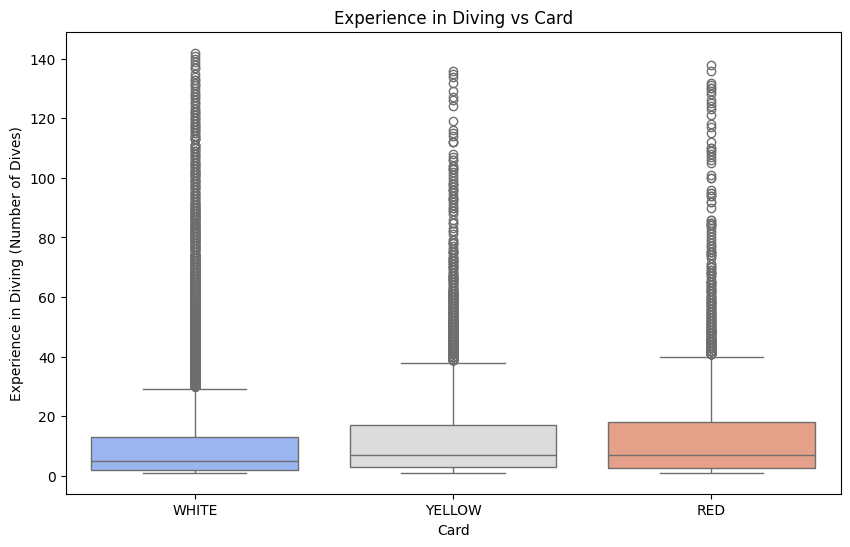

In [13]:
# experience in diving vs card type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Card', y='experience_dive', data=data, palette='coolwarm')
plt.title('Experience in Diving vs Card')
plt.xlabel('Card')
plt.ylabel('Experience in Diving (Number of Dives)')
plt.show()


This boxplot shows the number of dives (diving experience) across card types.

Observations:
 - WHITE cards correspond to divers with relatively lower experience levels, as shown by the compact boxplot near the lower range.
 - YELLOW cards reflect moderate experience, with a slightly broader distribution.
 - RED cards are more frequent among experienced divers, evident from the higher median and extended range.

Experienced divers may face situations leading to RED cards, possibly due to challenging dives or increased risk-taking.

C:\Users\amina\AppData\Local\Temp\ipykernel_26644\4082931910.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Card', y='experience_dive', data=data, palette='coolwarm')


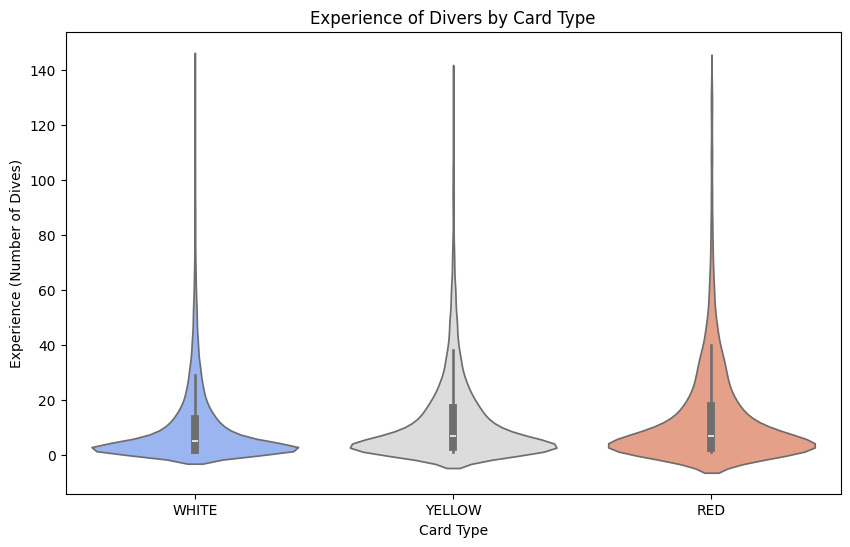

C:\Users\amina\AppData\Local\Temp\ipykernel_26644\4082931910.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Card', y='experience_discipline', data=data, palette='coolwarm')


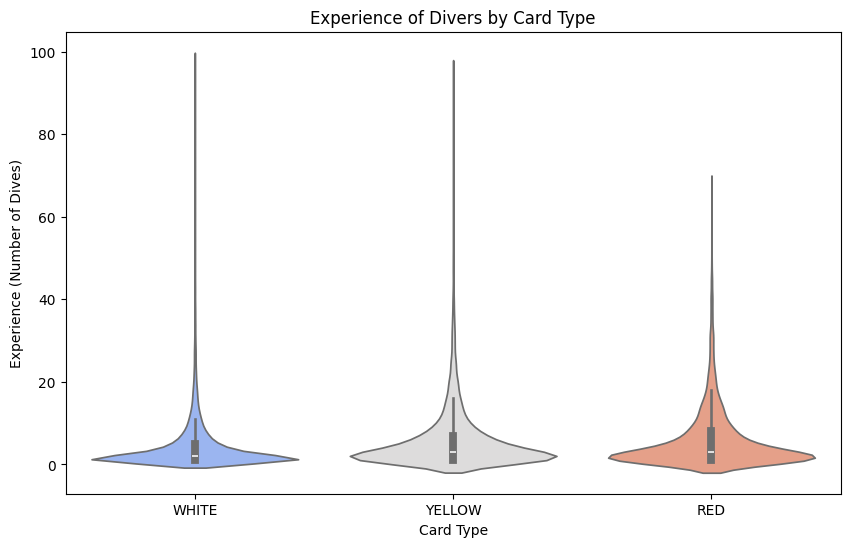

In [ ]:
# 1st graph
plt.figure(figsize=(10, 6))
sns.violinplot(x='Card', y='experience_dive', data=data, palette='coolwarm')
plt.title('Experience of Divers by Card Type')
plt.xlabel('Card Type')
plt.ylabel('Experience (Number of Dives)')
plt.show()

# 2nd graph
plt.figure(figsize=(10, 6))
sns.violinplot(x='Card', y='experience_discipline', data=data, palette='coolwarm')
plt.title('Experience of Divers by Card Type')
plt.xlabel('Card Type')
plt.ylabel('Experience (Number of Dives)')
plt.show()


The violin plot provides a more detailed density distribution of diving experience for each card type.

Observations:
 - WHITE cards have a dense peak at low experience, confirming that less experienced divers are more likely to receive WHITE cards.
 - YELLOW cards have a broader distribution, suggesting a mix of divers with varying experience levels.
 - RED cards show a notable tail at higher experience levels, reinforcing the trend observed earlier.

RED cards correlate with high diving experience, while WHITE cards are skewed towards beginners.

The second violin plot reinforces the trends in the previous visualizations, emphasizing differences in the experience levels for each card type.

Observations:
 - WHITE cards concentrate around low experience levels.
 - RED cards have a much wider spread, indicating that RED cards are more common among experienced divers.

Prepare the DataFrame for Learning

In [15]:
features = ['AP', 'RP', 'Month', 'experience_dive', 'experience_discipline', 'Gender', 'Discipline', 'Event Type']
X = data[features]


In [16]:
y = data['Card']

In [17]:
data.shape

(31371, 16)